In [4]:
# ref. https://superuser.com/questions/726543/how-to-open-raw-file-with-bizarre-custom-header
import matplotlib.cm as cm
import numpy as np
import pylab

import warnings
warnings.filterwarnings('ignore')

In [6]:
filename = "165749merged_0009.img"

f_in = open(filename,'rb') 

header = f_in.read(512)
print (f"header:{header}")
#b'{\nHEADER_BYTES=  512;\nBEAM_CENTER_X=57.3440018;\nBEAM_CENTER_Y=57.3440018;\nBIN=2x2;\nBYTE_ORDER=little_endian;\nDATE=Thu Jan  1 00:00:09 1970;\nDETECTOR_SN=unknown;\nDIM=2;\nDISTANCE=759.469971;\nOSC_RANGE=0.600000024;\nOSC_START=4.80000019;\nPHI=4.80000019;\nSIZE1=2048;\nSIZE2=2048;\nIMAGE_PEDESTAL=128;\nPIXEL_SIZE=0.0560000017;\nTIME=1;\nWAVELENGTH=0.0196000002;\nTWOTHETA=0;\nTYPE=unsigned_short;\n}\n 

header:b'{\nHEADER_BYTES=  512;\nBEAM_CENTER_X=57.3440018;\nBEAM_CENTER_Y=57.3440018;\nBIN=2x2;\nBYTE_ORDER=little_endian;\nDATE=Thu Jan  1 00:00:09 1970;\nDETECTOR_SN=unknown;\nDIM=2;\nDISTANCE=759.469971;\nOSC_RANGE=0.600000024;\nOSC_START=4.80000019;\nPHI=4.80000019;\nSIZE1=2048;\nSIZE2=2048;\nIMAGE_PEDESTAL=128;\nPIXEL_SIZE=0.0560000017;\nTIME=1;\nWAVELENGTH=0.0196000002;\nTWOTHETA=0;\nTYPE=unsigned_short;\n}\n                                                                                                                             '


In [5]:
#rest = f_in.read()
#print (f"rest:{rest}")
#...f\x00\x9a\x00\\\x00'

#rest_encoded = int(rest.encode('hex'), 16)
#AttributeError: 'bytes' object has no attribute 'encode'

#And everything else is 8 bit encoded, 
#so let's load it into numpy and display it with matplotlib
bin_image = np.fromstring(f_in.read(), dtype=np.uint8)

print (f"bin_image.shape:{bin_image.shape}")
#(8388608,)

print (f"len(bin_image):{len(bin_image)}")
#8388608

#Change the shape of the array to the actual shape of the picture
bin_image.shape = (2048, -1)
## e.g. 2048, 4096

header:b'{\nHEADER_BYTES=  512;\nBEAM_CENTER_X=57.3440018;\nBEAM_CENTER_Y=57.3440018;\nBIN=2x2;\nBYTE_ORDER=little_endian;\nDATE=Thu Jan  1 00:00:09 1970;\nDETECTOR_SN=unknown;\nDIM=2;\nDISTANCE=759.469971;\nOSC_RANGE=0.600000024;\nOSC_START=4.80000019;\nPHI=4.80000019;\nSIZE1=2048;\nSIZE2=2048;\nIMAGE_PEDESTAL=128;\nPIXEL_SIZE=0.0560000017;\nTIME=1;\nWAVELENGTH=0.0196000002;\nTWOTHETA=0;\nTYPE=unsigned_short;\n}\n                                                                                                                             '
bin_image.shape:(8388608,)
len(bin_image):8388608


In [9]:
print (f"bin_image.shape:{bin_image.shape}")
bin_image

bin_image.shape:(2048, 4096)


array([[128,   0, 128, ...,   0, 117,   0],
       [145,   0, 145, ...,   0, 106,   0],
       [158,   0, 158, ...,   0, 106,   0],
       ...,
       [149,   0, 149, ...,   0, 142,   0],
       [139,   0, 139, ...,   0,  88,   0],
       [121,   0, 121, ...,   0,  92,   0]], dtype=uint8)

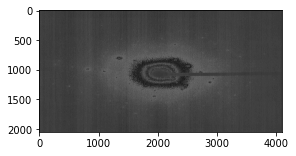

In [12]:
fig = pylab.figure(figsize = (20,20))

fig.add_subplot(1,4,1)
pylab.imshow(bin_image, cmap=cm.gray)